In [1]:
from matplotlib import pyplot as plt
from data_prep import DataPrep
# from data_binning import DataBinning
from gsm_data import GSMData, get_desired_frequencies
import numpy as np

# Creating gsm calibration data (power-ish) from selections

In [2]:
year = '2021'
instrument = '100MHz'
channel = 'EW'
calibration_type = 'GSM'
path = '/Volumes/SSData/'

In [35]:
d = DataPrep(instrument, channel, year)
cal_data, sidereal_times = d(calibration_type)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/SSData/marion2022/prizm-100/data_100MHz/16349/1634901246/time_sys_start.raw'

In [ ]:
#I normally save the output of the dataprep since I run into memory issues and experience crashes
with open(f'{path}/GSM_Cal_Power_and_Times/{year}/{instrument}_{channel}_{year}.npz', 'wb') as g:
    np.savez(g, power=cal_data, times=sidereal_times)   

In [ ]:
plt.figure(1, figsize=(20, 20))
plt.imshow(np.log10(cal_data[150000:160000,1200:1600]), vmin=8.5, vmax=9.5)

# Removing RFI and Binning Antenna Data

In [5]:
minperbin = 2
flow = 50
fhigh = 150

In [ ]:
alldata = np.load(f'{path}/GSM_Cal_Power_and_Times/{year}/{instrument}_{channel}_{year}.npz')
data = alldata['power']
times = alldata['times']

In [ ]:
b = DataBinning(data, times, minperbin, flow, fhigh)
final_data = b()

# Get GSM data if doing GSM cal

In [6]:
if calibration_type == 'GSM':
    try:
        with open(f'./GSM_averages/{instrument}_{channel}_GSM_average_{minperbin}min.npy', 'rb') as f:
            Tgsm = np.load(f)
    except:
        g = GSMData(instrument, channel, minperbin)
        Tgsm = g()

In [14]:
gsm = get_desired_frequencies(Tgsm, flow, fhigh)

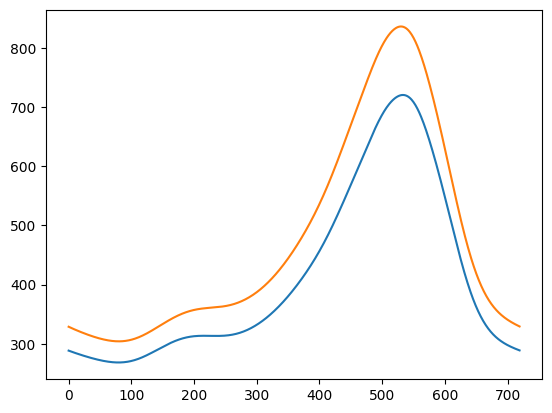

In [19]:
plt.plot(gsm[:,-1])
plt.plot(gsm[:,-5])

In [3]:
from matplotlib import pyplot as plt
from data_prep import DataPrep
# from data_binning import DataBinning
from gsm_data import GSMData, get_desired_frequencies
import numpy as np

In [4]:
year = '2021'
instrument = '100MHz'
channel = 'EW'
calibration_type = 'GSM'
# path = '/Volumes/SSData/'

minperbin = 2
flow = 50
fhigh = 150

In [5]:
# Trying to do the calibration from scratch
g = GSMData(instrument, channel, minperbin)

In [6]:
Tgsm = g()

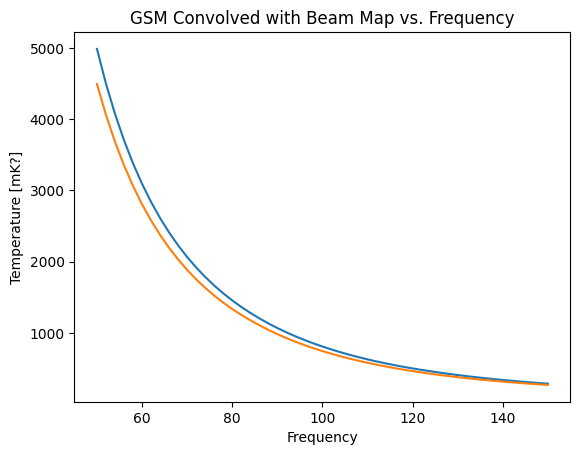

In [30]:
gsm = get_desired_frequencies(Tgsm, flow, fhigh)

freqs = np.linspace(flow,fhigh,len(gsm[0]))
# print(freqs)
plt.plot(freqs,gsm[0])
plt.plot(freqs,gsm[100])
plt.xlabel('Frequency')
plt.ylabel('Temperature [mK?]')
plt.title('GSM Convolved with Beam Map vs. Frequency')
plt.show()

* laurie-branch
  main
